In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
gpu_data_path = "/kaggle/input/general-computer-hardware-dataset/GPUData.csv"
gpu = pd.read_csv(gpu_data_path, na_values=[" ", "", "MHz"])
gpu = gpu[['Name', 'Producer', 'HDMI', 'Boost Clock', 'Vram', 'Memory Clock']]

In [3]:
# Load the CPU data file
cpu_data_path = "/kaggle/input/general-computer-hardware-dataset/CPUData.csv"
cpu = pd.read_csv(cpu_data_path, na_values=[" ", "", "GHz"])
cpu = cpu[['Name', 'Price', 'Producer', 'MPN', 'EAN', 'UPC', 'Base Clock', 'Turbo Clock', 'Unlocked Multiplier', 'Cores', 'Threads', 'TDP', 'Socket', 'Integrated GPU', 'Product Page']]

In [4]:
# Cleaning and preprocessing CPU data
cpu = cpu.dropna(subset=['Base Clock'])
cpu['Cores'] = cpu['Cores'].replace(0, 10)
cpu['base_clock'] = cpu['Base Clock'].str.extract('(\d+)').astype(float)
cpu['turbo_clock'] = cpu['Turbo Clock'].str.extract('(\d+)').astype(float)
cpu['tdp'] = cpu['TDP'].str.extract('(\d+)').astype(float)


In [5]:
# Cleaning and preprocessing GPU data
gpu['memory_clock'] = gpu['Memory Clock'].str.extract('(\d+)').astype(float)
gpu['boost_clock'] = gpu['Boost Clock'].str.extract('(\d+)').astype(float)


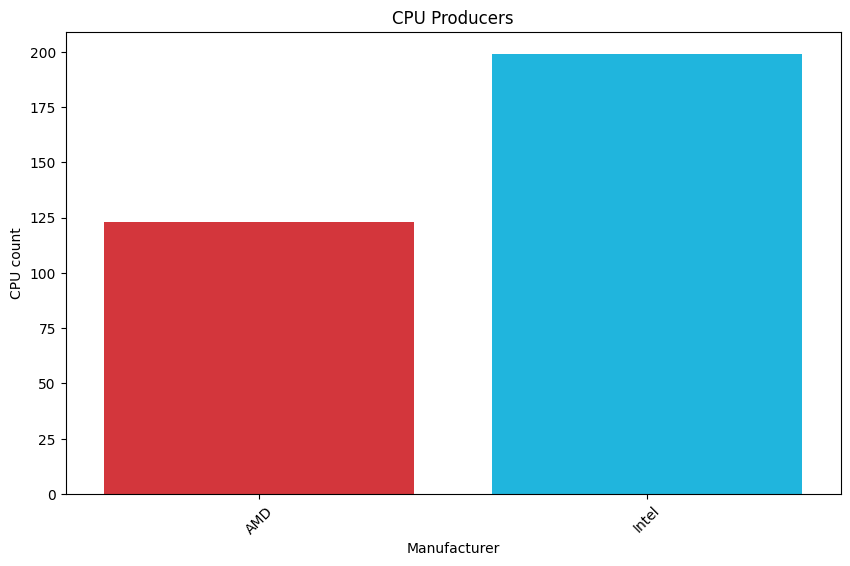

In [6]:
# Plotting CPU producers
plt.figure(figsize=(10, 6))
sns.countplot(data=cpu, x='Producer', palette=['#ED1C24', '#00C7FD'])
plt.title("CPU Producers")
plt.xlabel("Manufacturer")
plt.ylabel("CPU count")
plt.xticks(rotation=45)
plt.show()

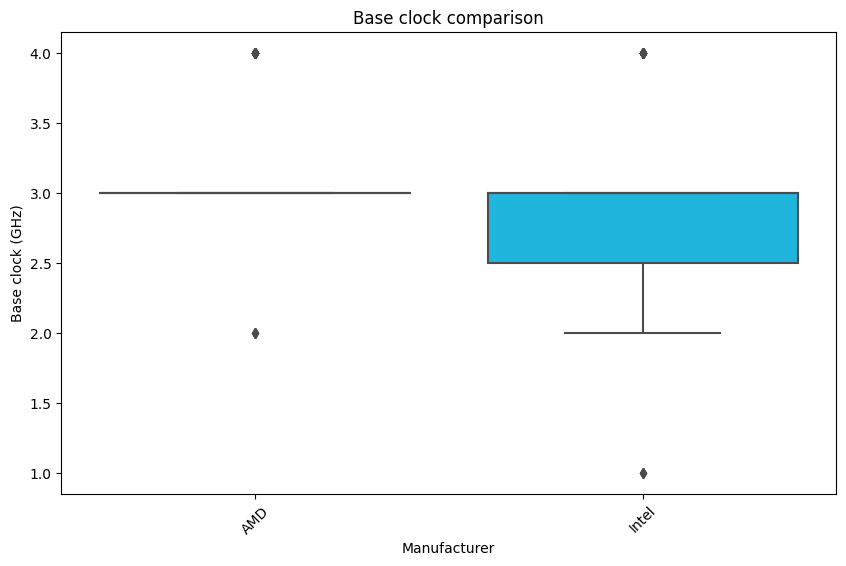

In [7]:
# Plotting base clock speeds on box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cpu, x='Producer', y='base_clock', palette=['#ED1C24', '#00C7FD'])
plt.title("Base clock comparison")
plt.xlabel("Manufacturer")
plt.ylabel("Base clock (GHz)")
plt.xticks(rotation=45)
plt.show()

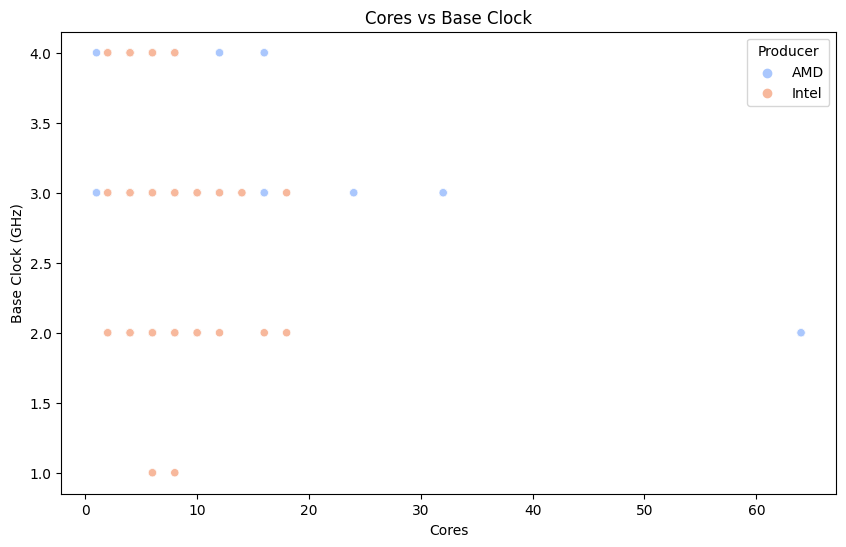

In [8]:
# Scatter plot comparing cores to base clock speeds
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cpu, x='Cores', y='base_clock', hue='Producer', palette='coolwarm')
plt.title("Cores vs Base Clock")
plt.xlabel("Cores")
plt.ylabel("Base Clock (GHz)")
plt.legend(title='Producer', loc='upper right')
plt.show()


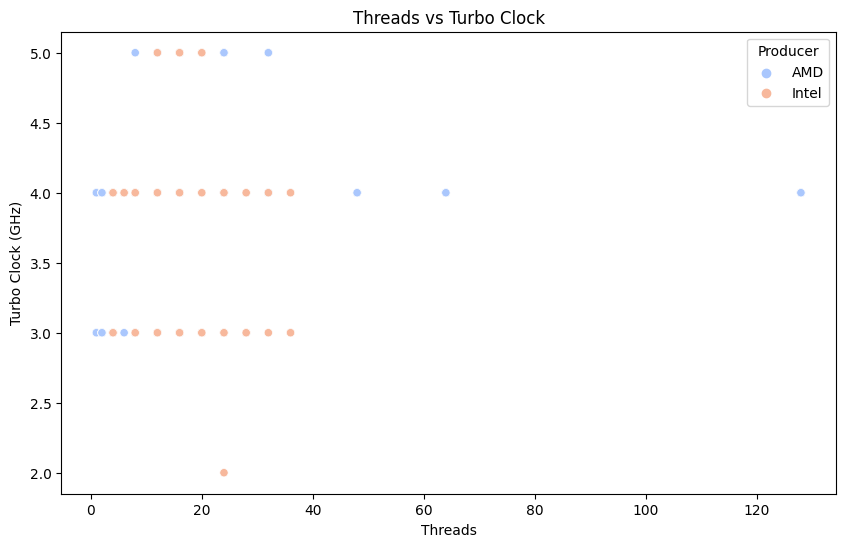

In [9]:
# Scatter plot comparing threads to turbo clock speeds
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cpu, x='Threads', y='turbo_clock', hue='Producer', palette='coolwarm')
plt.title("Threads vs Turbo Clock")
plt.xlabel("Threads")
plt.ylabel("Turbo Clock (GHz)")
plt.legend(title='Producer', loc='upper right')
plt.show()


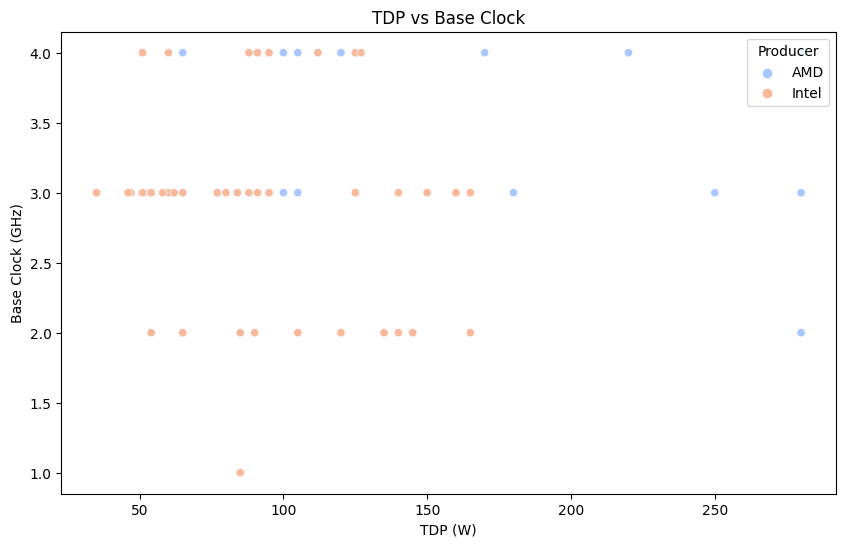

In [10]:
# Scatter plot comparing TDP to base clock speeds
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cpu, x='tdp', y='base_clock', hue='Producer', palette='coolwarm')
plt.title("TDP vs Base Clock")
plt.xlabel("TDP (W)")
plt.ylabel("Base Clock (GHz)")
plt.legend(title='Producer', loc='upper right')
plt.show()

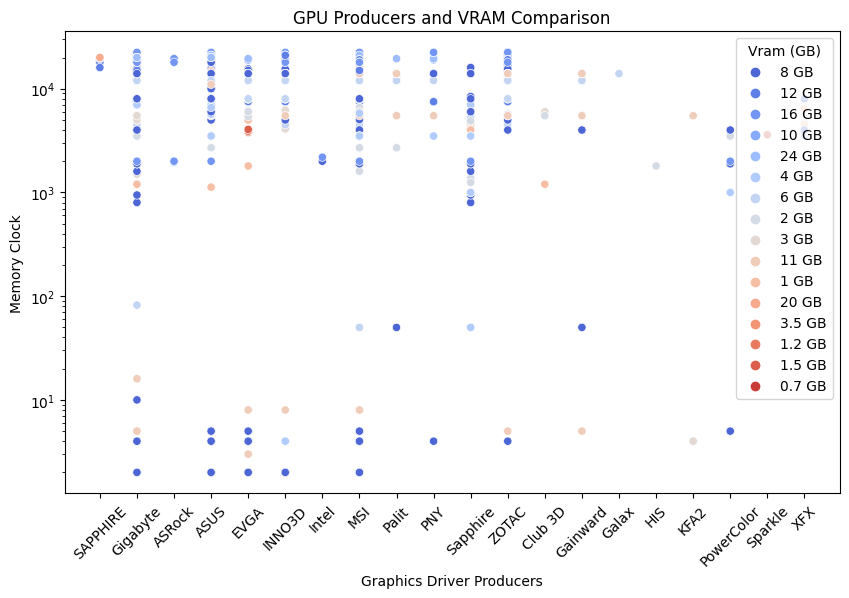

In [11]:
# Plotting GPU producers and VRAM comparison
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu, x='Producer', y='memory_clock', hue='Vram', palette='coolwarm')
plt.title("GPU Producers and VRAM Comparison")
plt.xlabel("Graphics Driver Producers")
plt.ylabel("Memory Clock")
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='Vram (GB)', loc='upper right')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


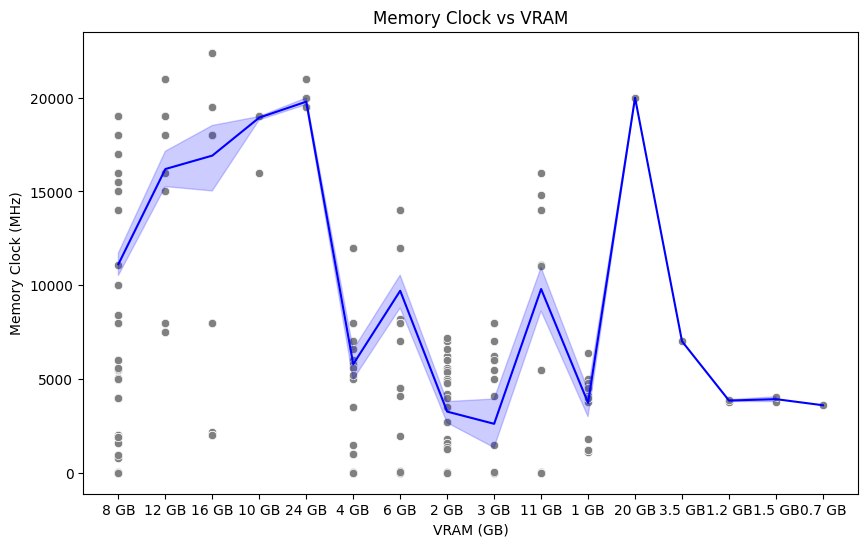

In [12]:
# Plotting memory clock vs VRAM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu, x='Vram', y='memory_clock', color='gray')
sns.lineplot(data=gpu, x='Vram', y='memory_clock', color='blue')
plt.title("Memory Clock vs VRAM")
plt.xlabel("VRAM (GB)")
plt.ylabel("Memory Clock (MHz)")
plt.show()

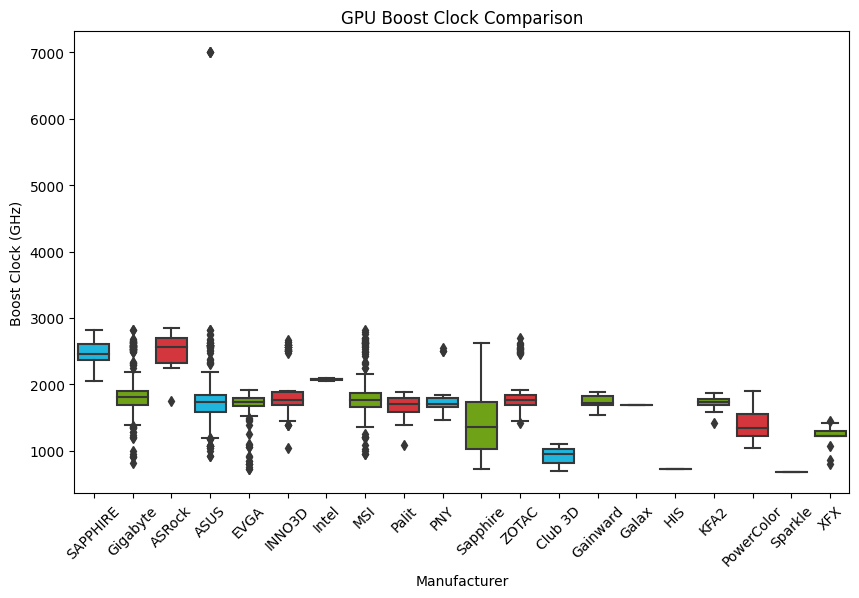

In [13]:
# Plotting boost clock speeds on box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=gpu, x='Producer', y='boost_clock', palette=['#00C7FD', '#76B900', '#ED1C24'])
plt.title("GPU Boost Clock Comparison")
plt.xlabel("Manufacturer")
plt.ylabel("Boost Clock (GHz)")
plt.xticks(rotation=45)
plt.show()


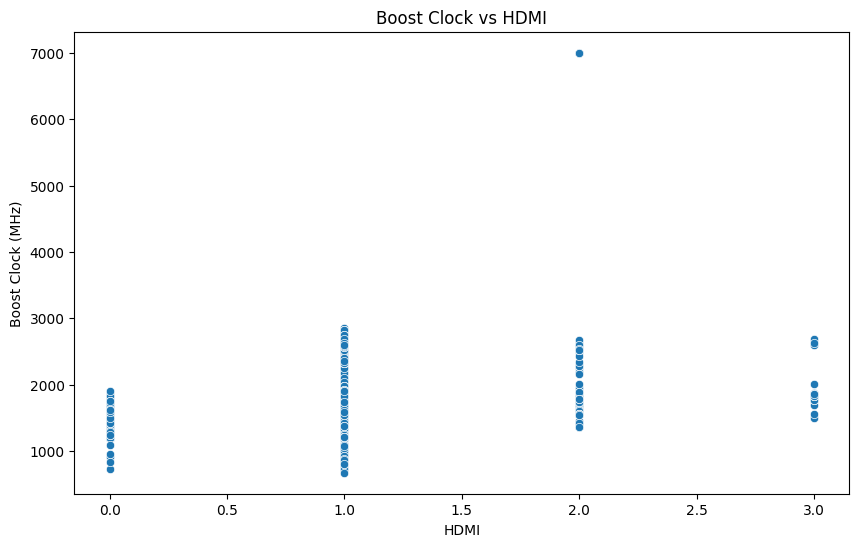

In [14]:
# Plotting boost clock against HDMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu, x='HDMI', y='boost_clock', color="#1f78b4")
plt.title("Boost Clock vs HDMI")
plt.xlabel("HDMI")
plt.ylabel("Boost Clock (MHz)")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


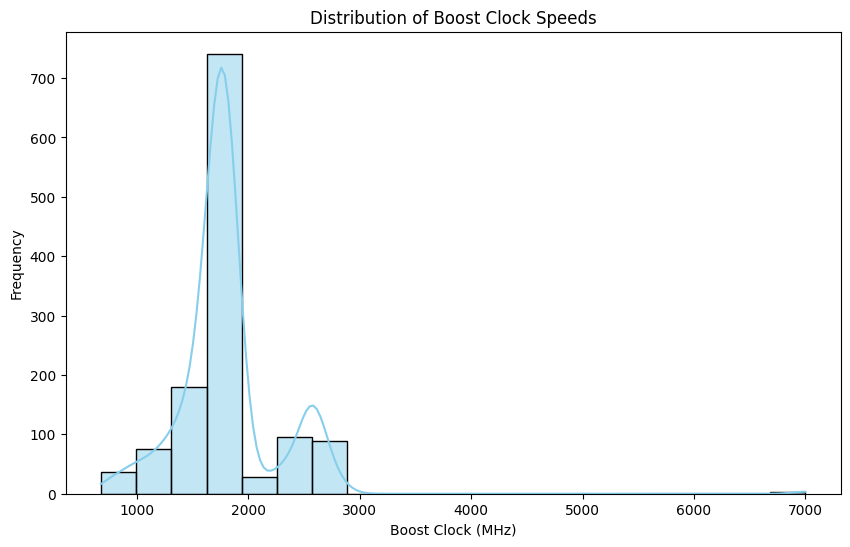

In [15]:
# Histogram of Boost Clock speeds
plt.figure(figsize=(10, 6))
sns.histplot(gpu['boost_clock'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Boost Clock Speeds')
plt.xlabel('Boost Clock (MHz)')
plt.ylabel('Frequency')
plt.show()

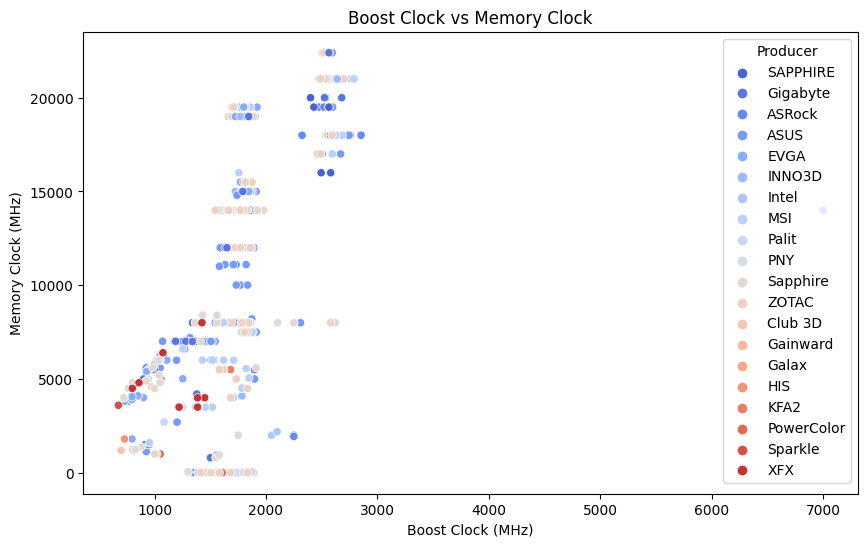

In [16]:
# Scatter plot comparing Boost Clock to Memory Clock
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu, x='boost_clock', y='memory_clock', hue='Producer', palette='coolwarm')
plt.title('Boost Clock vs Memory Clock')
plt.xlabel('Boost Clock (MHz)')
plt.ylabel('Memory Clock (MHz)')
plt.legend(title='Producer', loc='upper right')
plt.show()


In [17]:
gpu['Vram'] = gpu['Vram'].str.extract('(\d+)').astype(float)

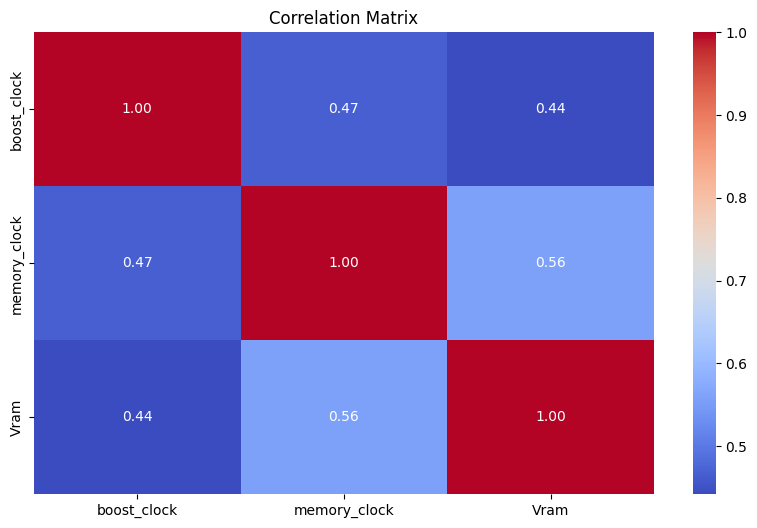

In [18]:
# Heatmap showing the correlation between numeric features
plt.figure(figsize=(10, 6))
corr_matrix = gpu[['boost_clock', 'memory_clock', 'Vram']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
cpu.head()

,Name,Price,Producer,MPN,EAN,UPC,Base Clock,Turbo Clock,Unlocked Multiplier,Cores,Threads,TDP,Socket,Integrated GPU,Product Page,base_clock,turbo_clock,tdp
0,AMD Ryzen 5 5600X,$158.86 USD,AMD,100-100000065BOX,730143312042,NaN,3.7 GHz,4.6 GHz,True,6,12,65 W,AM4,False,https://www.amazon.ca/dp/B08166SLDF?tag=pckomb...,3.0,4.0,65.0
1,AMD Athlon 3000G,$53.22 USD,AMD,YD3000C6FHBOX,730143311731,NaN,3.5 GHz,NaN,True,2,4,35 W,AM4,Radeon RX Vega 3,https://www.amazon.ca/dp/B0815JGFQ8?tag=pckomb...,3.0,NaN,35.0
2,AMD Ryzen 3 3300X,$150.09 USD,AMD,100-100000159BOX,730143312172,NaN,3.8 GHz,4.3 GHz,True,4,8,65 W,AM4,False,https://www.amazon.ca/dp/B0876YS2T4?tag=pckomb...,3.0,4.0,65.0
3,AMD Ryzen 5 5500,$87.04 USD,AMD,100-100000457BOX,730143314121,NaN,3.6 GHz,4.2 GHz,True,6,12,65 W,AM4,False,https://www.amazon.ca/dp/B09VCJ171S?tag=pckomb...,3.0,4.0,65.0
4,AMD Ryzen 5 5600,$133.46 USD,AMD,100-100000927BOX,730143314190,NaN,3.5 GHz,4.4 GHz,True,6,12,65 W,AM4,False,https://www.amazon.ca/dp/B09VCHR1VH?tag=pckomb...,3.0,4.0,65.0


In [20]:
cpu['Price'] = cpu['Price'].str.extract('(\d+)').astype(float)

In [21]:
y=cpu['Price']

In [22]:
cpu=cpu.drop(['Price', 'MPN', 'EAN', 'UPC', 'Base Clock', 'Turbo Clock', 'TDP', 'Product Page'], axis=1)

In [23]:
# Encode categorical variables
cpu=cpu.fillna(0)
cpu = pd.get_dummies(cpu, columns=['Name','Producer', 'Unlocked Multiplier', 'Socket', 'Integrated GPU'], drop_first=True).astype(int)

In [24]:
# Select features and target variable
X = cpu

In [25]:
X=X.fillna(0)
y=y.fillna(0)

In [26]:
y.head()

0    158.0
1     53.0
2    150.0
3     87.0
4    133.0
Name: Price, dtype: float64

In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# List of models to train
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost Regressor": xgb.XGBRegressor(),
    "CatBoost Regressor": cb.CatBoostRegressor(verbose=0),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor()
}

In [31]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    results.append({
        "Model": name,
        "Train RMSE": rmse_train,
        "Test RMSE": rmse_test,
        "Train R2": r2_train,
        "Test R2": r2_test
    })
# Convert results to DataFrame
results_df = pd.DataFrame(results)
# Save results to CSV
results_df.to_csv("model_results.csv", index=False)

In [34]:
results_df.head()

,Model,Train RMSE,Test RMSE,Train R2,Test R2
0,Linear Regression,17.647381,3.020169e+11,0.999148,-1.990045e+17
1,Ridge Regression,123.925087,3.001681e+02,0.957998,8.034245e-01
2,Lasso Regression,134.896345,3.335851e+02,0.950232,7.572196e-01
3,Decision Tree Regressor,17.647378,3.028705e+02,0.999148,7.998691e-01
4,Random Forest Regressor,151.008943,3.531154e+02,0.937633,7.279595e-01


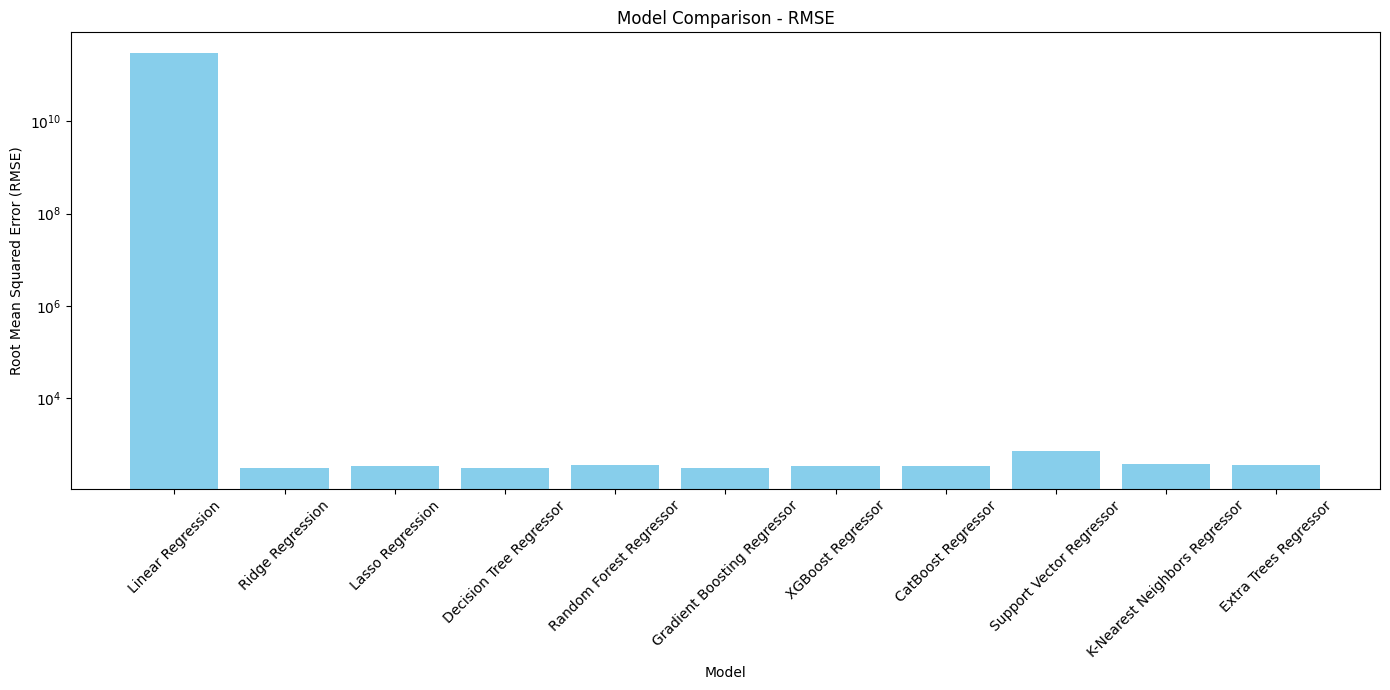

In [37]:
plt.figure(figsize=(14, 7))
plt.bar(results_df['Model'], results_df['Test RMSE'], color='skyblue')
plt.title('Model Comparison - RMSE')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Model')
plt.yscale('log') 
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

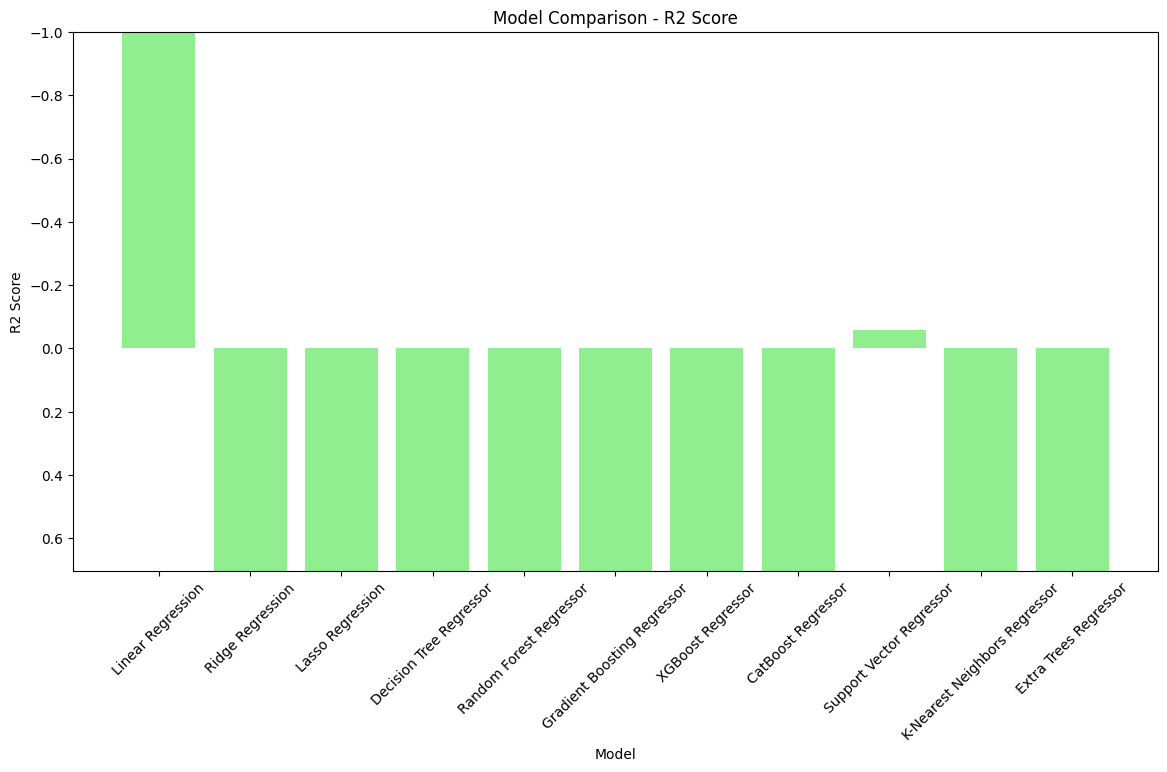

In [48]:
# Plotting R2 scores
plt.figure(figsize=(14, 7))
plt.bar(results_df['Model'], results_df['Test R2'], color='lightgreen')
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(max(results_df['Test R2']) - 0.1, -1) 
plt.show()

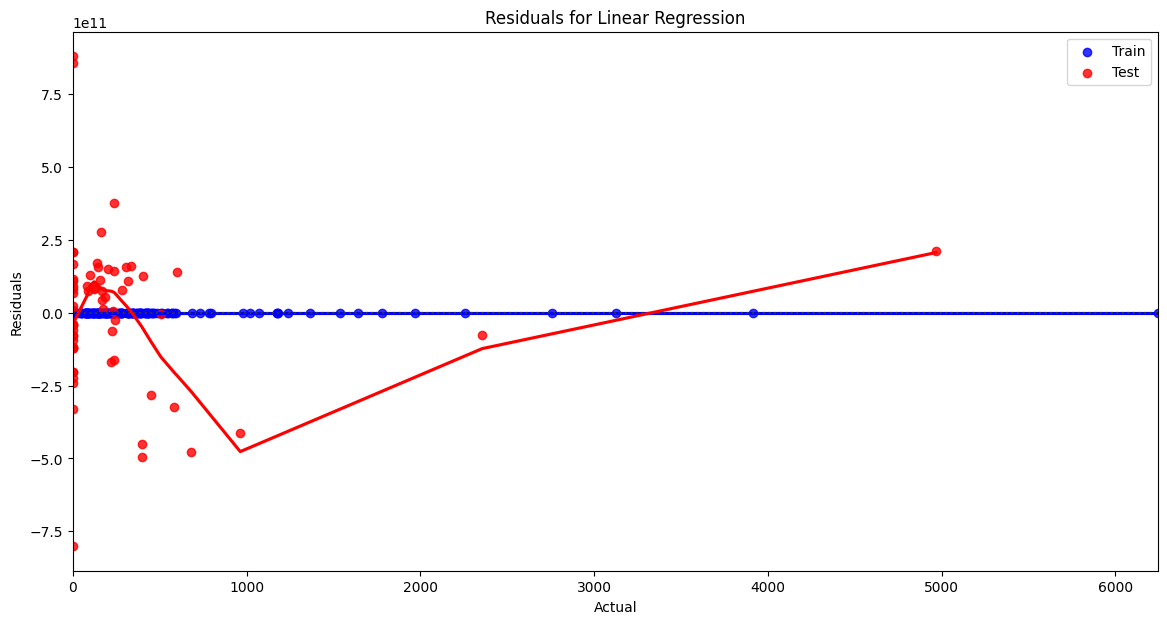

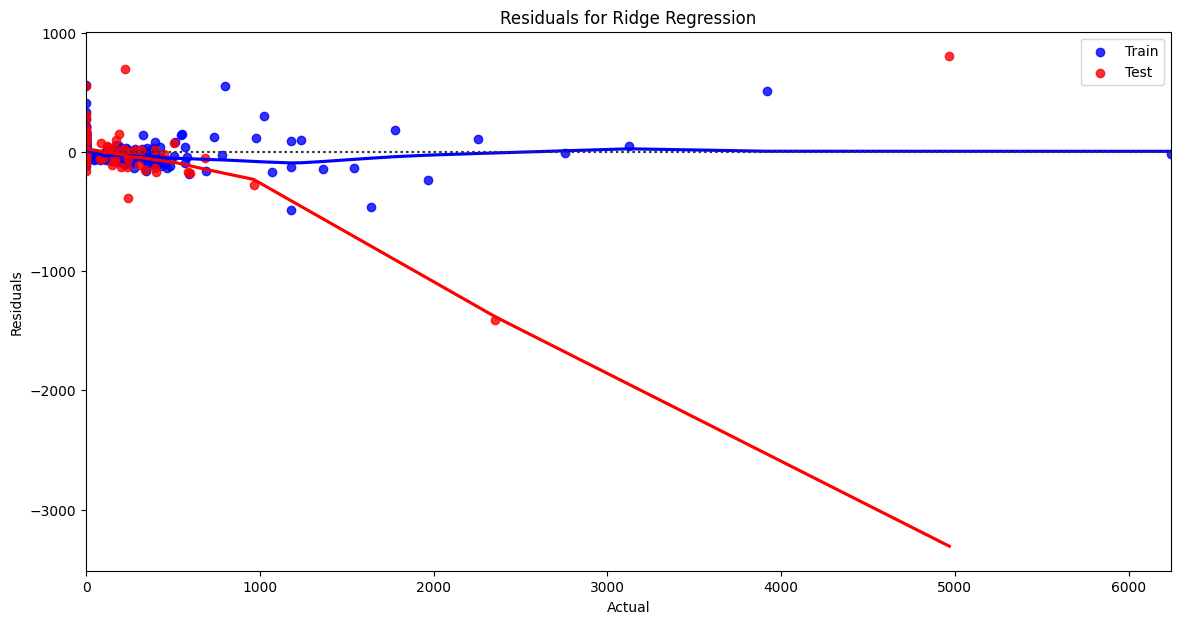

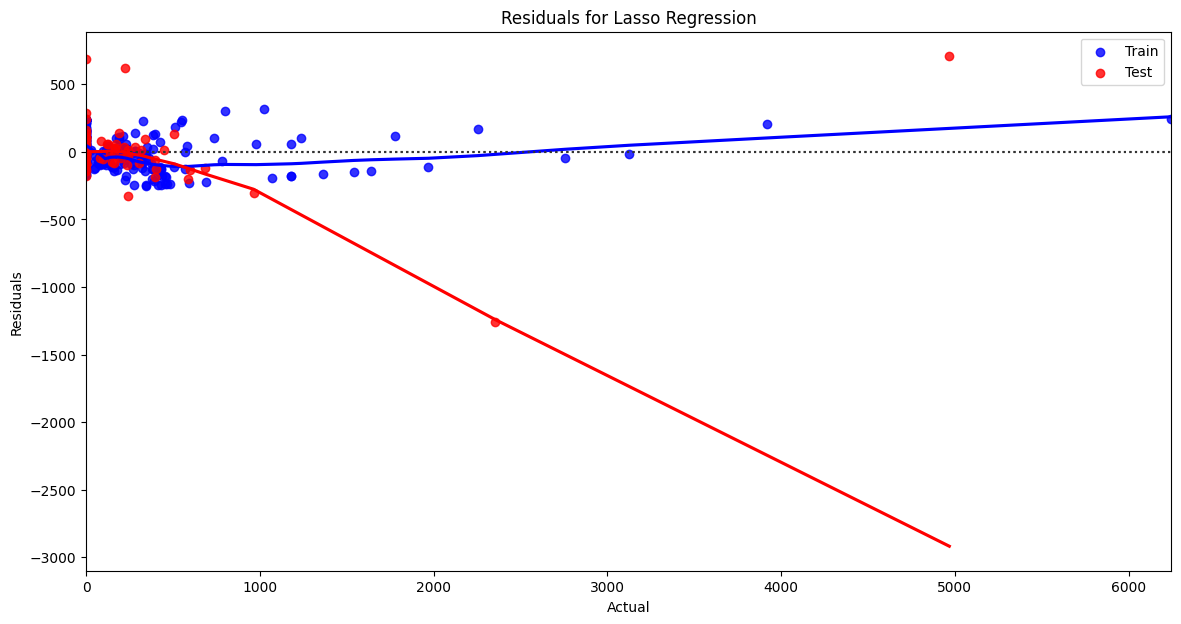

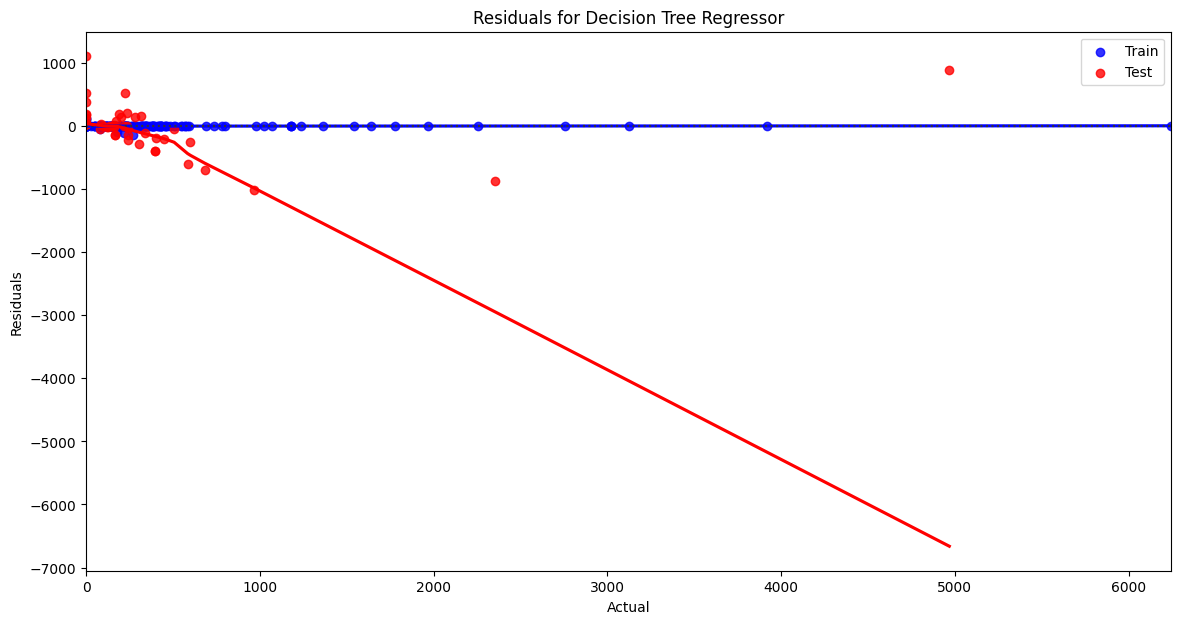

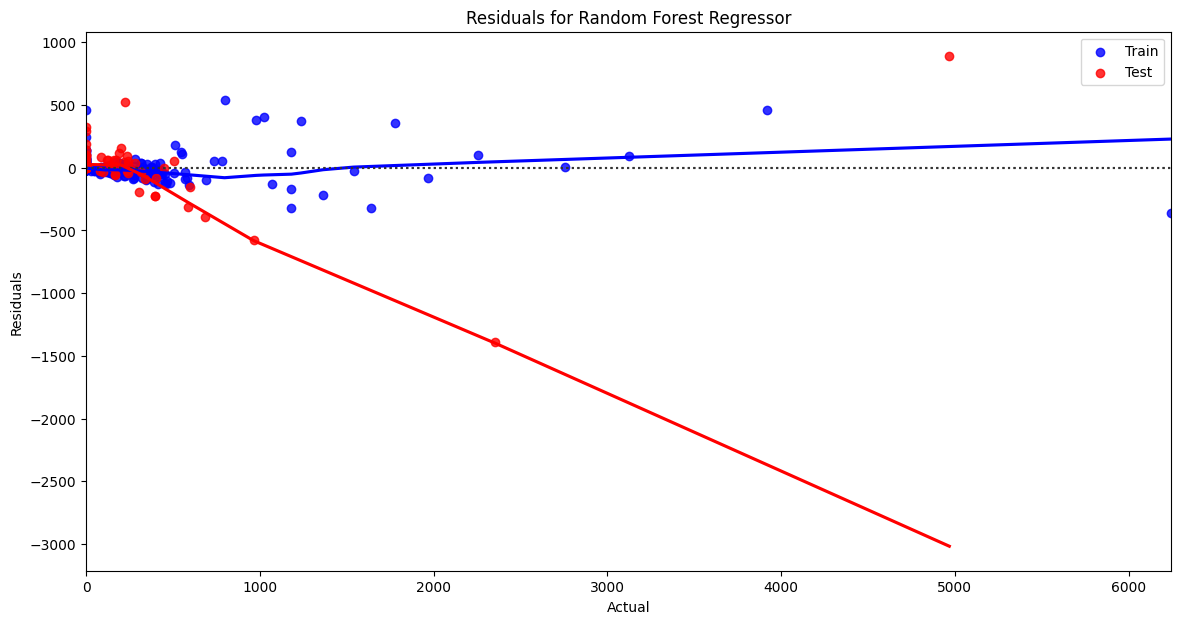

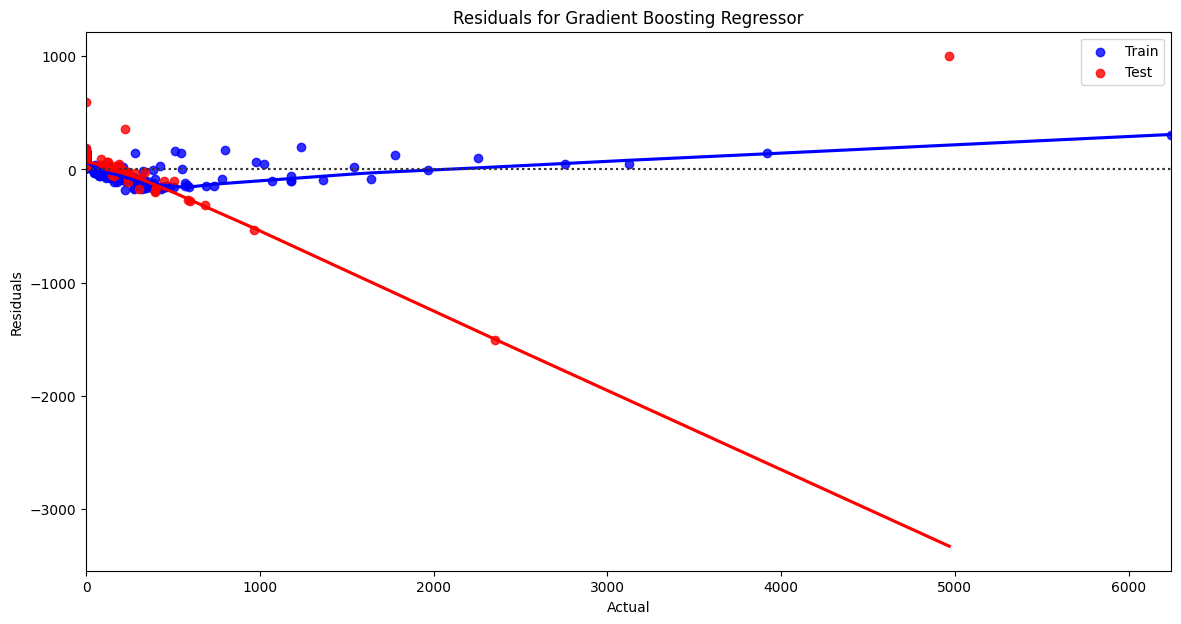

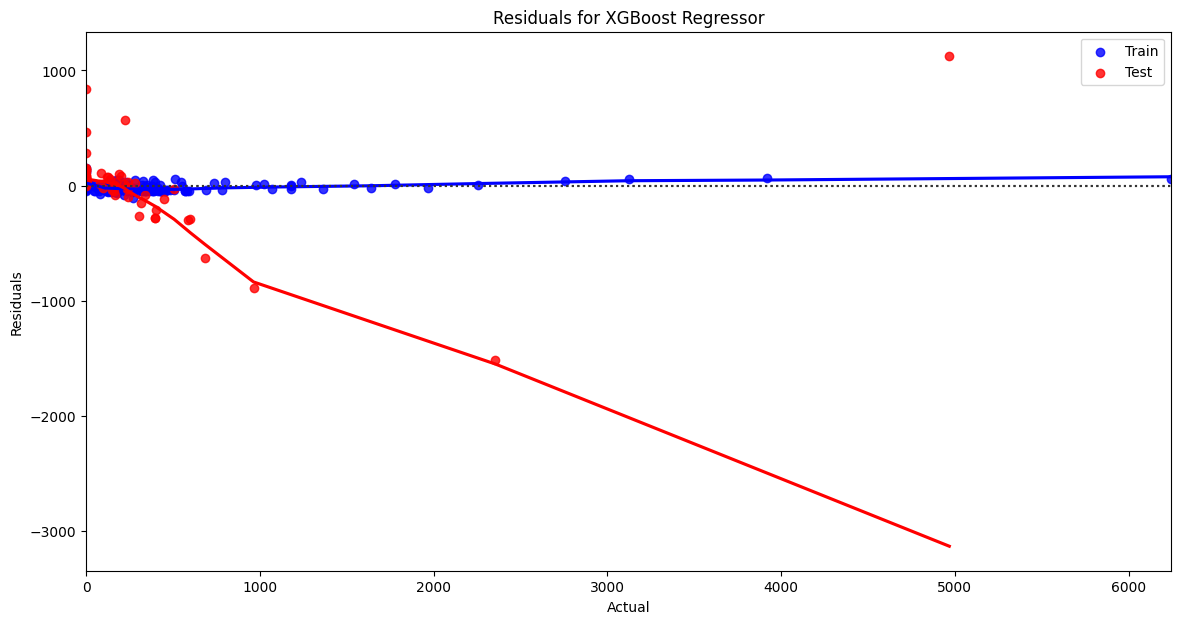

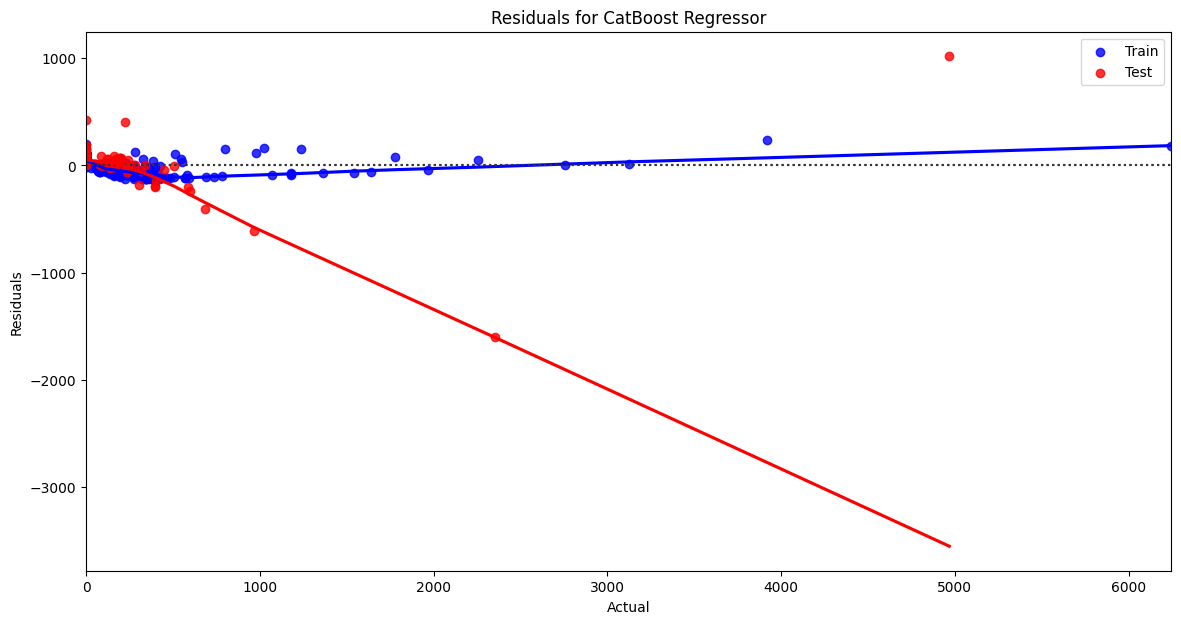

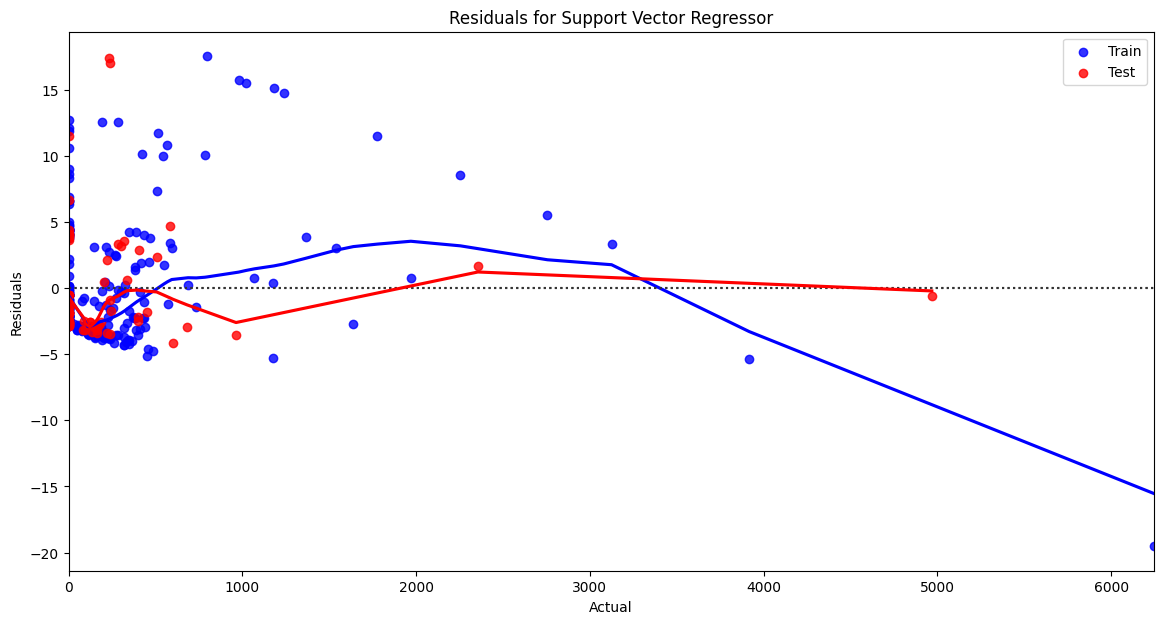

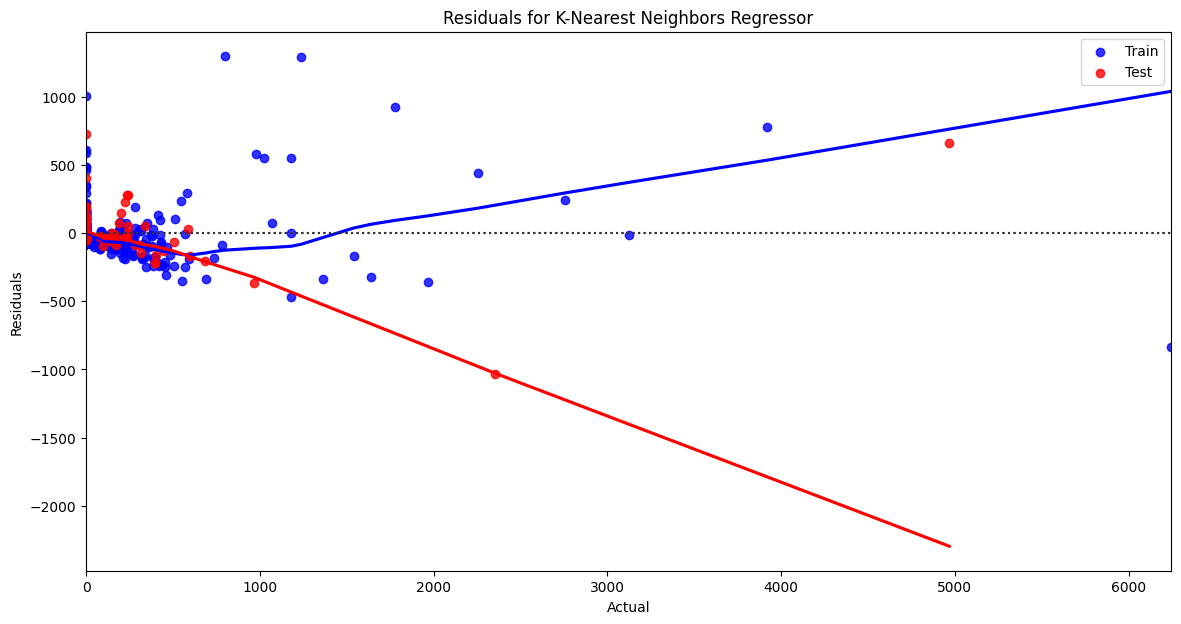

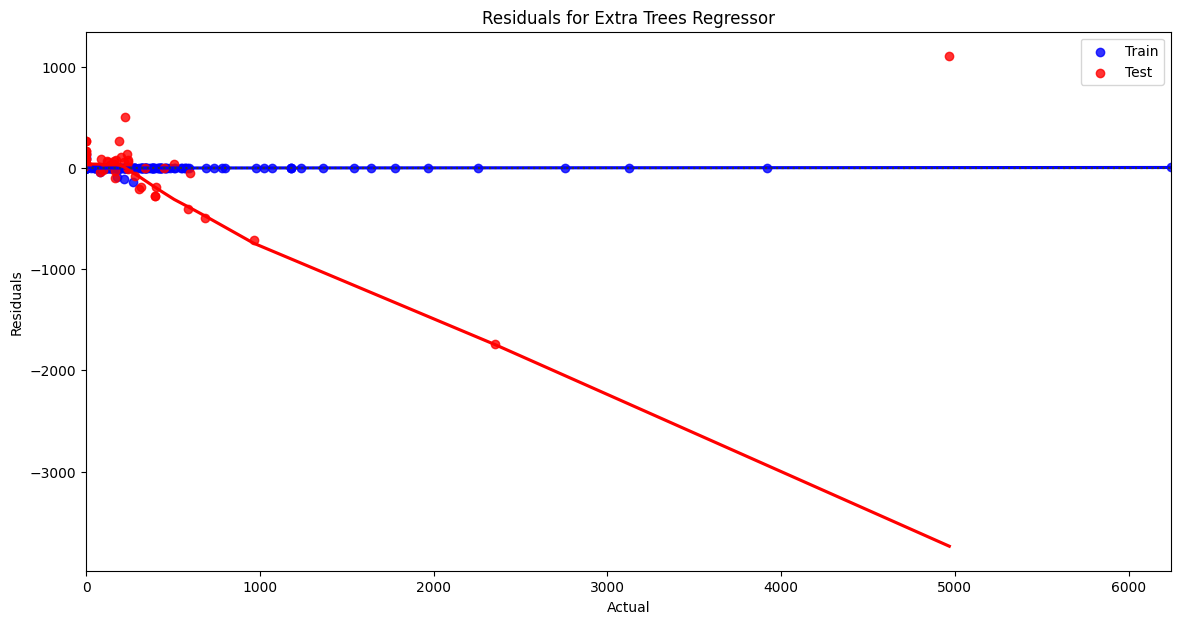

In [50]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # Plot residuals for training data
    plt.figure(figsize=(14, 7))
    sns.residplot(x=y_train, y=y_pred_train, lowess=True, label='Train', color='blue')
    # Plot residuals for testing data
    sns.residplot(x=y_test, y=y_pred_test, lowess=True, label='Test', color='red')
    plt.title(f'Residuals for {name}')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()